In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import tensorflow as tf
import os, sys, time
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import utils, optimization, metrics, plot
import pickle

In [4]:
spix = 256
path = '../data/size{}_splits1000_n500x3/'.format(spix)
input_pattern = 'Box_70*snapshot_050'
file_ext = '.dat'
k = 10

In [5]:
queue = []
for file in os.listdir(path):
    if file.endswith(file_ext) and (np.all([x in file for x in input_pattern.split("*")])):
        queue.append(os.path.join(path, file))
nsamples = len(queue)
print('They are {} "{}" files.'.format(nsamples, file_ext))  

They are 15000 ".dat" files.


In [6]:
nsamples = 10
input_img = np.vstack(map(lambda i:np.fromfile(queue[i], dtype=float32), range(nsamples)))
input_img.resize([nsamples,spix,spix])
input_img = utils.forward_map(input_img,k)

In [7]:
img = input_img[1]

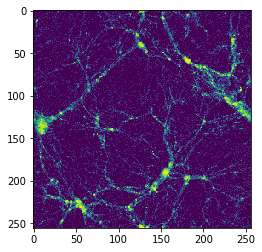

In [8]:
plt.imshow(img)

In [95]:
def down_sampler(x, s=2):
    filt = tf.constant(1/(s*s),dtype=tf.float32,shape=[s,s,1,1])
    return tf.nn.conv2d(x,filt,strides=[1,s,s,1], padding='SAME')

def up_sampler(x, s=2):
    filt = tf.constant(1/(s*s),dtype=tf.float32,shape=[s,s,1,1])
    bs = tf.shape(x)[0]
    shx2 = x.shape.as_list()[1:]
    output_shape = [bs, shx2[0]*s, shx2[1]*s,shx2[2]]
    return tf.nn.conv2d_transpose(x,filt, output_shape=output_shape,strides=[1,s,s,1], padding='SAME')

Tensor("Shape_8:0", shape=(4,), dtype=int32)
[16, 16, 1]
[<tf.Tensor 'strided_slice_25:0' shape=() dtype=int32>, 256, 256, 1]


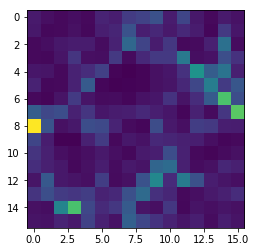

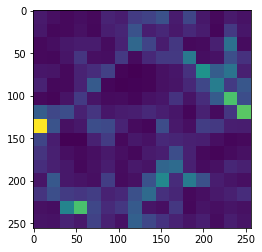

In [105]:
img_in = tf.placeholder(tf.float32, shape=[None, 256, 256, 1])
s = 16
sin = img.shape[0]
img_small = down_sampler(img_in,s=s)
img_big = up_sampler(img_small,s=s)

with tf.Session() as sess:
    out = img_small.eval(feed_dict={img_in: img.reshape([1,sin,sin,1])}).reshape([sin//s,sin//s])
    out2 = img_big.eval(feed_dict={img_in: img.reshape([1,sin,sin,1])}).reshape([sin,sin])

plt.figure(0)
plt.imshow(out)
plt.figure(1)
plt.imshow(out2)

In [3]:
import functools

x = [1,2,3,4]
y = 1
def func(x,y=2):
    return x+y

res = list(map(functools.partial(func,y=y),x))
print(res)

[2, 3, 4, 5]


In [21]:
import tensorflow as tf
t = tf.get_variable(name="mean3", dtype=tf.float32, shape=[1], trainable=False)

In [22]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    t.assign([0.2], True).eval()

    print(sess.run(t))

[0.2]
